### **Definitions:**
1. **Population**: In statistics, population is the entire set of items from which you draw data for a statistical study. It can be a group of individuals, a set of items, etc. It makes up the data pool for a study.
2. **Sample**: A sample is defined as a smaller and more manageable representation of a larger group. A subset of a larger population that contains characteristics of that population. A sample is used in statistical testing when the population size is too large for all members or observations to be included in the test.
3. **Population Parameter**:

    - Mean, $\mu = \Sigma X / N$ 
    
        where, $\Sigma X$ is the sum of all values in the population
        and $N$ is the size of the population.
    
    - Standard deviation, $\sigma = \sqrt{\frac{\sum(X-\mu)^2}{N}}$
    
        where, $X$ is a value in the popluation,
        $\mu$ is the popluation mean,
        and $N$ is the size of the population
4. **Sample Statistic**:

    - Mean, $\bar{x} = \Sigma x / n$ 
    
        where, $\Sigma x$ is the sum of all values in the sample
        and $n$ is the size of the sample.
    
    - Standard deviation, $s = \sqrt{\frac{\sum(x-\bar{x})^2}{n-1}}$
    
        where, $x$ is a value in the sample,
        $\bar{x}$ is the popluation sample,
        and $n$ is the size of the sample
        

A population parameter is a numerical value that describes a characteristic of a population, such as the mean or standard deviation. It is usually unknown and is estimated from sample data. For example, the population mean height of all students in a school is a population parameter.

A sample statistic, on the other hand, is a numerical value that describes a characteristic of a sample, such as the sample mean or sample standard deviation. It is calculated from sample data and used to make inferences about the population. For example, the sample mean height of a group of randomly selected students is a sample statistic.    
    

## Point Estimates

Point estimates are estimates of population parameters based on sample data. For instance, if we wanted to know the average age of registered voters in India, we could take a survey of registered voters and then use the average age of the respondents as a point estimate of the average age of the population as a whole. The average of a sample is known as the **sample mean**.

The sample mean is usually not exeactly the same as the population mean. This difference can be caused by many factors such as poor survey, biased sampling methods and the randomness inherent to drawing a sample from a population.

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson

In [2]:
np.random.seed(46) # For reproducability
population_age_1 = poisson.rvs(loc=18, mu=35, size=150000)
population_age_2 = poisson.rvs(loc=18, mu=10, size=100000)
population = np.concatenate((population_age_1, population_age_2))
print(len(population))
print(population.mean())

250000
42.991528


In [3]:
sample = np.random.choice(a=population, size=1000)
print(sample.mean())
print(population.mean() - sample.mean())

42.535
0.4565280000000058


Our point estimate based on a sample of 1000 individuals underestimates the true population mean by 0.456 years, but it is close. This illustrates an important point: We can get a fairly accurate estimate of a large population by sampling a relatively small subset of individuals.

In [4]:
population_races = (["white"]*100000) + (["black"]*50000) + \
                   (["hispanic"]*50000) + (["asian"]*25000) + \
                   (["other"]*25000)

for race in set(population_races):
    print(race + " proportion estimate:")
    print(population_races.count(race)/250000)

demo_sample = random.sample(population_races, 1000)
print(set(demo_sample))
for race in set(demo_sample):
    print(race + " proportion estimate:")
    print(demo_sample.count(race)/1000)
    


other proportion estimate:
0.1
black proportion estimate:
0.2
asian proportion estimate:
0.1
white proportion estimate:
0.4
hispanic proportion estimate:
0.2
{'other', 'black', 'asian', 'white', 'hispanic'}
other proportion estimate:
0.115
black proportion estimate:
0.177
asian proportion estimate:
0.092
white proportion estimate:
0.413
hispanic proportion estimate:
0.203


<br>

## Sampling Distributions and Central Limit Theorem

Many statistical procedures assume that the data follows a normal distribution, because the normal distribution has nice properties like symmetricity and having the majority of the data clustered withing a few standard deviations of the mean. Unfortunately, real world data is often not normally distributed and the distribution of a sample tends to mirror the distribution of the population.

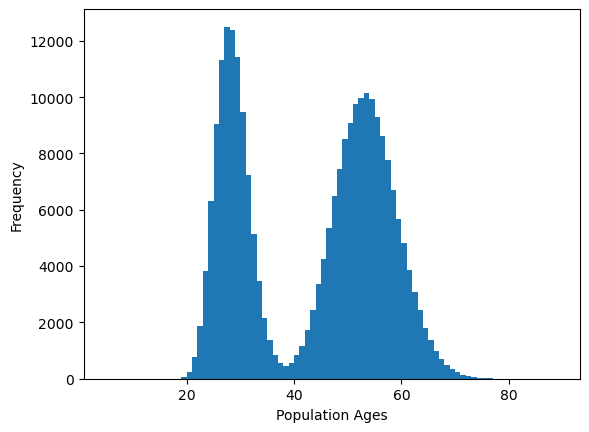

In [5]:
plt.hist(population, bins=range(5, 90, 1))
plt.xlabel("Population Ages")
plt.ylabel("Frequency")
plt.show()

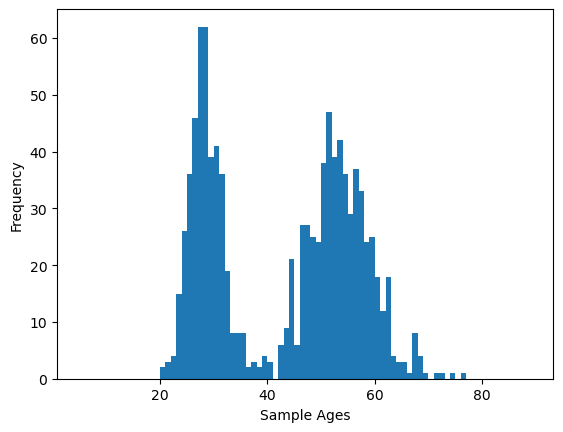

In [6]:
plt.hist(sample, bins=range(5, 90, 1))
plt.xlabel("Sample Ages")
plt.ylabel("Frequency")
plt.show()

The sample has the roughly the same shape as the underlying population. This suggested that we can't apply techniques that assume a normal distribution to this dataset, since it is not normal. 

**In reality, we can actually apply techniques of normal distribution !**

**Thanks to Central Limit Theorem.**

## Central Limit Theorem

The central limit theorem is one of the most important results of probability theory and servers as the foundation of many methods of statistical analysis. At a high level, the theorem states the distribution of many sample means, known as **sampling distribution**, will be (approximately) normally distributed. This rule holds true even if the underlying distribution itself is not normally distributed. As a result we can treat the sample mean as if it were drawn from normal distribution.

To illustrate, let's create a sampling distribution by taking 200 samples from our population and then making 200 point estimates of the mean.

In [7]:
point_estimates = []  # <---- ? Sample means
for iteration in range(200):
    sample = np.random.choice(a=population, size=200)
    point_estimates.append(sample.mean())

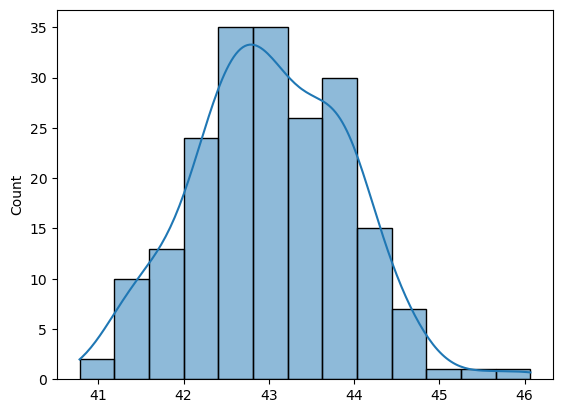

In [8]:
sns.histplot(point_estimates, kde=True)
plt.show()

The sampling distribution appears to be roughly normal, despite the bimodal population distribution that the samples were drawn from. In addition, the mean of the sampling distribution approaches the true population mean.

In [9]:
print(np.array(point_estimates).mean())

43.025675


<br>

## Confidence Intervals

A point estimate can give you a rough idea of a population parameter like the mean, but estimates are prone to error and taking multiple samples to get improved estimates may not be feasible.

A confidence interval is a range of values above and below a point estimate that captures the true population parameter at some predetermined confidence level. For example, if you want to have 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, you would set your confidence level to 95%. Higher confidence levels result in a wider confidence intervals.

Calculate a confidence interval by taking a point estimate and then adding and subtracting a margin of error to create a range. Margin of error is based on your desired confidence level, the spread of the data and the size of your sample. The way you calculate the margin of error depends on whether you know the standard deviation of the population or not.

If you know the standard deviation of the population, the margin of error is equal to:

$$z * \frac{\sigma}{\sqrt{n}}$$

Where $\sigma$ (sigma) is the population standard deviation, $n$ is sample size, and $z$ is a number known as the z-critical value. The z-critical value is the number of standard deviations you'd have to go from the mean of the normal distribution to capture the proportion of the data associated with the desired confidence level. For instance, we know that roughly 95% of the data in a normal distribution lies within 2 standard deviations of the mean, so we could use 2 as the z-critical value for a 95% confidence interval (although it is more exact to get z-critical values with stats.norm.ppf().).

**Z-Table**: [Link](https://byjus.com/maths/z-score-table/)

**Z-Calculator**: [Link](https://www.calculator.net/z-score-calculator.html?c1raw=5&c1mean=0&c1sd=1&calctype=zscore&x=Calculate)

Let's calculate a 95% confidence for our mean point estimate:

In [11]:
from scipy.stats import norm

sample_size = 1000
sample = np.random.choice(a=population, size=sample_size)
sample_mean = sample.mean()

z_critical = norm.ppf(q=0.975)
print(f"z-critical value: {z_critical}")

pop_stddev = population.std()

margin_of_error = z_critical * (pop_stddev / math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                      sample_mean + margin_of_error)

print(f"Confidence Interval: {confidence_interval}")

z-critical value: 1.959963984540054
Confidence Interval: (41.78425214484725, 43.42374785515275)


In [12]:
from scipy.stats import norm

sample_size = 1000
sample = np.random.choice(a=population, size=sample_size)
sample_mean = sample.mean()

z_critical = norm.ppf(q=0.995)
print(f"z-critical value: {z_critical}")

pop_stddev = population.std()

margin_of_error = z_critical * (pop_stddev / math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                      sample_mean + margin_of_error)

print(f"Confidence Interval: {confidence_interval}")

z-critical value: 2.5758293035489004
Confidence Interval: (41.52166870030302, 43.676331299696976)


Notice that the confidence interval we calculated captures the true population mean of 42.99.

### Wait ! Let's understand Level of Significance !

The method norm.ppf() takes a percentage and returns a standard deviation multiplier for what value that percentage occurs at.
It is equivalent to a **'One-tail test'** on the density plot.

From scipy.stats.norm:

ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles).

**For one-tailed test:**

norm.ppf(q=0.95)
Returns a 95% confidence interval for a one-tail test on a standard normal distribution (i.e. a special case of the normal distribution where the mean is 0 and the standard deviation is 1).

**For two-tailed test:**
If we need to calculate a **'Two-tail test'** (i.e. We're concerned with values both greater and less than our mean) then we need to split the significance (i.e. our alpha value) because we're still using a calculation method for one-tail. The split in half symbolizes the significance level being appropriated to both tails. A 95% confidence level has a 5% alpha; splitting the 5% alpha across both tails returns 2.5%. Taking 2.5% from 100% returns 97.5% as an input for the significance level.

Therefore, if we were concerned with values on both sides of our mean, our code would input .975 to represent a 95% confidence level across two-tails:
norm.ppf(q=0.975)

<div align = "center">
<img src = "https://i.stack.imgur.com/KmJzJm.png" width = 600 />
</div>

<div align = "center">
<img src = "https://www.simplypsychology.org/wp-content/uploads/SND.png" width = 600 />
</div>

Let's create several confidence intervals and plot them to get a better sense of what it means to "capture" the true mean:

In [15]:
sample_size = 1000  
intervals = list()  # list of tuples
sample_means = list()

for sample in range(25):
    sample = np.random.choice(a=population, size=sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    
    z_critical = norm.ppf(q=0.975)
    pop_stddev = population.std()

    margin_of_error = z_critical * (pop_stddev / math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                          sample_mean + margin_of_error)

    intervals.append(confidence_interval)

[]

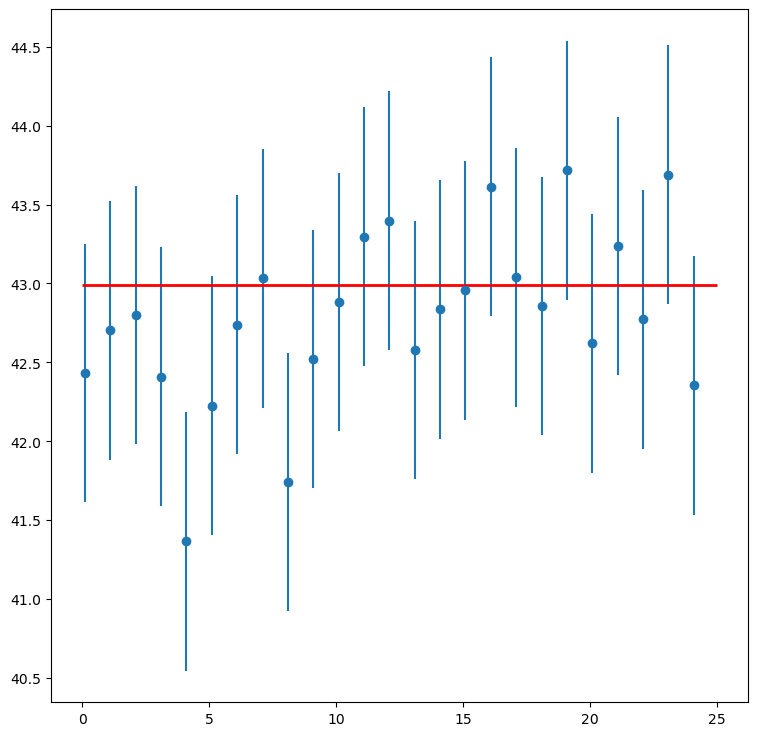

In [16]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[abs(top - bot) / 2 for top, bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=42.99, 
           linewidth=2.0,
           color="red")
plt.plot()

Notice that in the plot above, all but two of the 95% confidence intervals overlap the red line marking the true mean. This is to be expected: since a 95% confidence interval captures the true mean 95% of the time, we'd expect our interval to miss the true mean 5% of the time.

If you don't know the standard deviation of the population, you have to use the standard deviation of your sample as a stand in when creating confidence intervals. Since the sample standard deviation may not match the population parameter the interval will have more error when you don't know the population standard deviation. To account for this error, we use what's known as a t-critical value instead of the z-critical value. The t-critical value is drawn from what's known as a t-distribution--a distribution that closely resembles the normal distribution but that gets wider and wider as the sample size falls. The t-distribution is available in scipy.stats with the nickname "t" so we can get t-critical values with stats.t.ppf().

Let's take a new, smaller sample and then create a confidence interval without the population standard deviation, using the t-distribution:

In [21]:
from scipy.stats import t

sample_size = 25
sample = np.random.choice(a=population, size=sample_size)
sample_mean = sample.mean()

t_critical = t.ppf(q=0.975, df=sample_size-1)

print(f"t-critical value: {t_critical}")

sample_stddev = sample.std(ddof=1)  #Very important to include ddof=1 as formula of sample's std divides by n - 1

std_dev_estimate = sample_stddev / math.sqrt(sample_size)

margin_of_error = t_critical * (std_dev_estimate)

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Confidence interval: {confidence_interval}")

t-critical value: 2.0638985616280205
Confidence interval: (36.29796254418255, 46.82203745581745)


*Note: when using the t-distribution, you have to supply the degrees of freedom (df). For this type of test, the degrees of freedom is equal to the sample size minus 1. If you have a large sample size, the t-distribution approaches the normal distribution.*

Notice that the t-critical value is larger than the z-critical value we used for 95% confidence interval. This allows the confidence interval to cast a larger net to make up for the variability caused by using the sample standard deviation in place of the population standard deviation. The end result is a much wider confidence interval (an interval with a larger margin of error.).

If you have a large sample, the t-critical value will approach the z-critical value so there is little difference between using the normal distribution vs. the t-distribution:

In [19]:
t.ppf(q=0.975, df=9999) - norm.ppf(q=0.975)

0.0002372790813034431

In [22]:
t.interval(
    confidence=0.95,  # Confidence interval, just write as it is, without splitting the alpha and adding it up.
    df=24,            # Degrees of freedom
    loc=sample_mean,  # Sample mean
    scale=std_dev_estimate       # Standard deviation estimate (Calculated in the above cell)
)

(36.29796254418255, 46.82203745581745)

We can also make a confidence interval for a point estimate of a population proportion. In this case, the margin of error equals:

$$z * \sqrt{\frac{p(1-p)}{n}}$$

Where z is the z-critical value for our confidence level, p is the point estimate of the population proportion and n is the sample size. Let's calculate a 95% confidence interval for Hispanics according to the sample proportion we calculated earlier:

In [23]:
z_critical = norm.ppf(0.975)

p = 0.203

n = 1000

margin_of_error = z_critical * math.sqrt((p * (1 - p)/n))

confidence_interval = (p - margin_of_error, p + margin_of_error)

confidence_interval

(0.17806982823847933, 0.2279301717615207)

The output shows that the confidence interval captured the true population parameter of 0.2. Similar to our population mean point estimates, we can use the scipy stats.distribution.interval() function to calculate a confidence interval for a population proportion for us. In this case were working with z-critical values so we want to work with the normal distribution instead of the t distribution:

In [25]:
norm.interval(
    confidence=0.95,
    loc=0.203,
    scale=math.sqrt((p * (1 - p)/n))
)

(0.17806982823847933, 0.2279301717615207)